1. Origin time of fixatons vs effect size
2. Origin time of fixations vs time to fixation

In [1]:
%matplotlib inline
import feather
import matplotlib
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
x=pd.read_hdf('../H2_0.2_OPT_0.5_mu_0.001.fixations.h5')

In [3]:
y=pd.read_hdf('../H2_0.2_OPT_1_mu_0.001.fixations.h5')

In [4]:
x.reset_index(inplace=True,drop=True)
y.reset_index(inplace=True,drop=True)

In [5]:
xmeans=x.groupby('generation').mean()
ymeans=y.groupby('generation').mean()

In [6]:
xmeans.reset_index(inplace=True)
ymeans.reset_index(inplace=True)

In [7]:
xmeans.head()

,generation,esize,freq,origin,pos,rep,age
0,9002,0.018188,0.0005,9002.0,0.877072,76.0,1.0
1,9003,0.018188,0.0005,9002.0,0.877072,76.0,2.0
2,9004,0.018188,0.0020,9002.0,0.877072,76.0,3.0
3,9005,0.018188,0.0035,9002.0,0.877072,76.0,4.0
4,9006,0.018188,0.0050,9002.0,0.877072,76.0,5.0


In [8]:
xmeans['scaled_time']=pd.Series(xmeans.generation-np.array([10000]*len(xmeans.index),dtype=np.float64))
xmeans['scaled_time']/=pd.Series(np.array([1000]*len(xmeans.index),dtype=np.float64))
ymeans['scaled_time']=pd.Series(ymeans.generation-np.array([10000]*len(ymeans.index),dtype=np.float64))
ymeans['scaled_time']/=pd.Series(np.array([1000]*len(ymeans.index),dtype=np.float64))

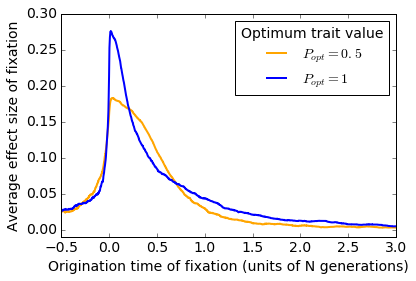

In [9]:
matplotlib.rcParams.update({'font.size': 14})
matplotlib.rcParams.update({'legend.fontsize': 14})
fig=matplotlib.pyplot.gcf()
fig.set_size_inches(10,12)
plt.figure()
plt.plot(xmeans.scaled_time,xmeans.esize,label=r'$P_{opt} = 0.5$',linewidth=2,color='orange')
plt.plot(ymeans.scaled_time,ymeans.esize,label=r'$P_{opt} = 1$',linewidth=2,color='blue')
plt.vlines(10000,-0.1,0.3)
plt.ylim(-0.01,0.3)
plt.xlim(-0.5,3)
plt.xlabel("Origination time of fixation (units of N generations)",fontsize=14)
plt.ylabel("Average effect size of fixation",fontsize=14)
plt.legend(title="Optimum trait value")
plt.savefig("OriginVsEsize.pdf",bbox_inches="tight")

Now, let's deal with problem 2: fixation times.

In [10]:
x.head()

,esize,freq,generation,origin,pos,rep,age
0,0.124055,0.0005,9493,9493,0.636345,0,1.0
1,0.124055,0.0010,9494,9493,0.636345,0,2.0
2,0.124055,0.0015,9495,9493,0.636345,0,3.0
3,0.124055,0.0020,9496,9493,0.636345,0,4.0
4,0.124055,0.0025,9497,9493,0.636345,0,5.0


In [30]:
xc=x.groupby(['pos','esize','origin','rep']).agg(['count'])

In [31]:
xc.head()

,,,,freq,generation,age
,,,,count,count,count
pos,esize,origin,rep,,,
0.000180,0.158032,9949,10,432,432,432
0.000465,0.014121,12231,815,2674,2674,2674
0.000642,0.041951,17183,501,1136,1136,1136
0.000755,0.046904,11769,556,2825,2825,2825
0.000838,-0.023535,12697,124,2961,2961,2961


In [32]:
xc.reset_index(inplace=True)

In [33]:
xc.head()

,pos,esize,origin,rep,freq,generation,age
,,,,,count,count,count
0,0.000180,0.158032,9949,10,432,432,432
1,0.000465,0.014121,12231,815,2674,2674,2674
2,0.000642,0.041951,17183,501,1136,1136,1136
3,0.000755,0.046904,11769,556,2825,2825,2825
4,0.000838,-0.023535,12697,124,2961,2961,2961


In [44]:
xcg=xc.groupby('origin').agg('mean')

In [45]:
xcg[:10]

,pos,esize,rep,freq,generation,age
,,,,count,count,count
origin,,,,,,
9002,0.877072,0.018188,76.0,1982.0,1982.0,1982.0
9011,0.781687,-0.029600,124.0,4533.0,4533.0,4533.0
9028,0.321720,0.004522,146.0,3236.0,3236.0,3236.0
9029,0.684199,0.048421,121.0,1383.0,1383.0,1383.0
9030,0.886848,0.012139,87.0,8350.0,8350.0,8350.0
9040,0.444194,-0.017387,757.0,4572.5,4572.5,4572.5
9041,0.978361,-0.017394,512.5,1649.0,1649.0,1649.0
9045,0.334274,0.067859,2.0,2514.0,2514.0,2514.0


In [47]:
xcg.reset_index(inplace=True)

In [48]:
xcg[:10]

,origin,pos,esize,rep,freq,generation,age
,,,,,count,count,count
0,9002,0.877072,0.018188,76.0,1982.0,1982.0,1982.0
1,9011,0.781687,-0.029600,124.0,4533.0,4533.0,4533.0
2,9028,0.321720,0.004522,146.0,3236.0,3236.0,3236.0
3,9029,0.684199,0.048421,121.0,1383.0,1383.0,1383.0
4,9030,0.886848,0.012139,87.0,8350.0,8350.0,8350.0
5,9040,0.444194,-0.017387,757.0,4572.5,4572.5,4572.5
6,9041,0.978361,-0.017394,512.5,1649.0,1649.0,1649.0
7,9045,0.334274,0.067859,2.0,2514.0,2514.0,2514.0
8,9050,0.892020,0.025010,1020.0,3567.0,3567.0,3567.0


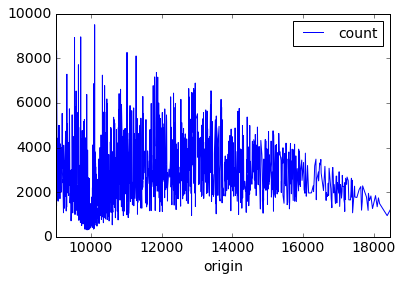

In [50]:
#This will need binning...
xcg.plot(x='origin',y='freq')

In [51]:
len(xcg.index)

1643

In [52]:
xcg.origin.max()

18474

In [53]:
len(xc.index)

2863

In [54]:
len(xmeans.index)

10992